In [25]:
import matplotlib.pyplot as plt
import numpy as np

def line(w, th=0):
    w2 = w[2] + .001 if w[2] == 0 else w[2]

    return lambda x: (th - w[1] * x - w[0]) / w2


def plot(func, X, target, padding=1, marker='o'):
    X = np.array(X)

    x_vals, y_vals = X[:, 1], X[:, 2]
    xmin, xmax, ymin, ymax = x_vals.min(), x_vals.max(), y_vals.min(), y_vals.max()

    markers = f'r{marker}', f'b{marker}'
    line_x = np.arange(xmin-padding-1, xmax+padding+1)

    for c, v in enumerate(np.unique(target)):
        p = X[np.where(target == v)]

        plt.plot(p[:,1], p[:,2], markers[c])

    plt.axis([xmin-padding, xmax+padding, ymin-padding, ymax+padding])
    plt.plot(line_x, func(line_x))
    plt.show()

In [33]:
def bipstep(y, th=0):
    return 1 if y >= th else -1


In [31]:
import sys

def adaline_fit(x, t, alpha=.1, max_err=.1, max_epoch=-1, verbose=False, draw=False):
    w = np.random.uniform(0, 1, len(x[0]) + 1)
    b = np.ones((len(x), 1))
    x = np.hstack((b, x))
    stop = False
    epoch = 0

    while not stop and (max_epoch == -1 or epoch < max_epoch):
        epoch += 1
        max_ch = -sys.maxsize

        if verbose:
            print('\nEpoch', epoch)

        for r, row in enumerate(x):
            y = np.dot(row, w)

            for i in range(len(row)):
                w_new = w[i] + alpha * (t[r] - y) * row[i]
                max_ch = max(abs(w[i] - w_new), max_ch)
                w[i] = w_new

            if verbose:
                print('Bobot:', w)

            if draw:
                plot(line(w), x, t)

        stop = max_ch < max_err

    return w,epoch

In [27]:
def adaline_predict(X, w):
    Y = []

    for x in X:
        y_in = w[0] + np.dot(x, w[1:])
        y = bipstep(y_in)

        Y.append(y)

    return Y

In [28]:
def calc_accuracy(a, b):
    s = [1 if a[i] == b[i] else 0 for i in range(len(a))]

    return sum(s) / len(a)

In [29]:
# k = (1, 1), (1, -1), (-1, 1), (-1, -1)
# b = np.ones((len(k), 1))
# k = np.hstack((b, k))

# print(b)
# print(k)

# for r, row in enumerate(k):
#     print(f"indeks ke-{r} isinya {row}")


Epoch 1
Bobot: [0.84751582 0.75650215 0.27090116]


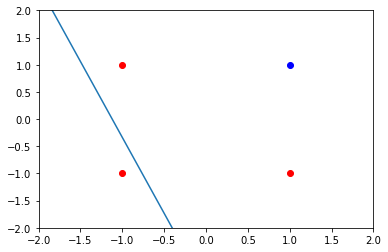

Bobot: [0.61420414 0.52319047 0.50421284]


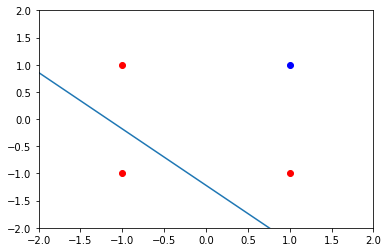

Bobot: [0.45468149 0.68271312 0.34469019]


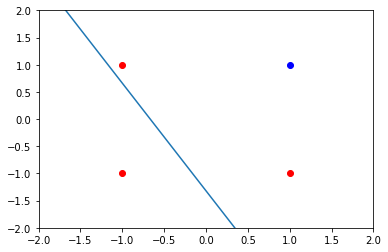

Bobot: [0.41195367 0.72544094 0.38741801]


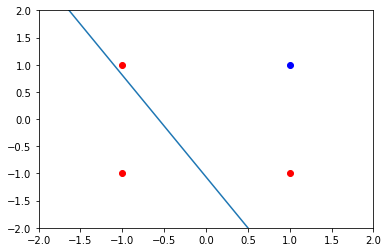


Epoch 2
Bobot: [0.35947241 0.67295968 0.33493674]


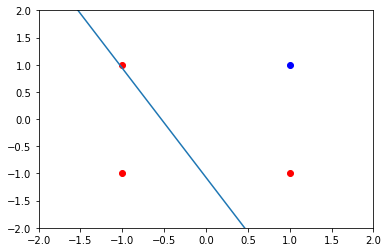

Bobot: [0.18972287 0.50321014 0.50468628]


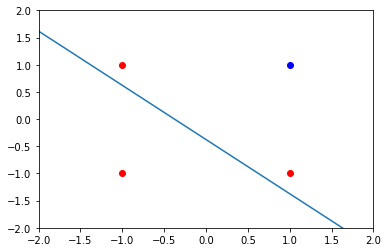

Bobot: [0.07060297 0.62233004 0.38556638]


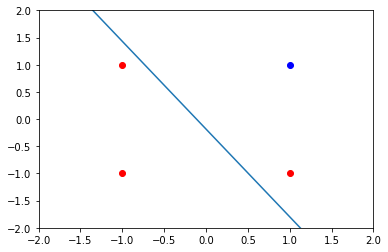

Bobot: [0.06433232 0.6286007  0.39183703]


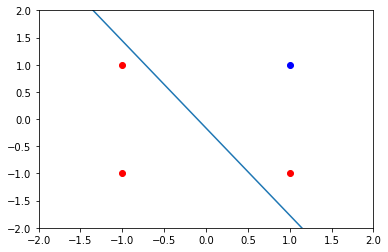


Epoch 3
Bobot: [0.05585531 0.62012369 0.38336003]


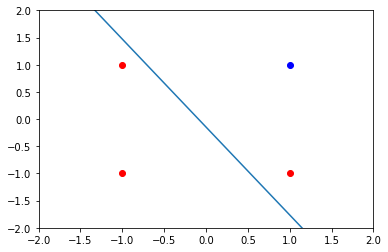

Bobot: [-0.07340658  0.4908618   0.51262193]


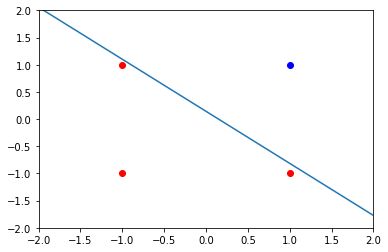

Bobot: [-0.16824194  0.58569715  0.41778657]


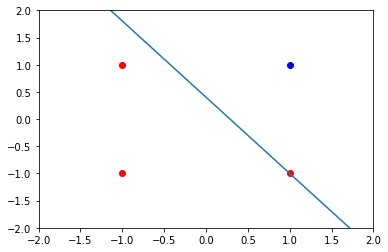

Bobot: [-0.15106937  0.56852458  0.40061401]


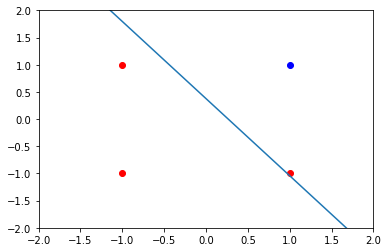


Epoch 4
Bobot: [-0.13287629  0.58671766  0.41880708]


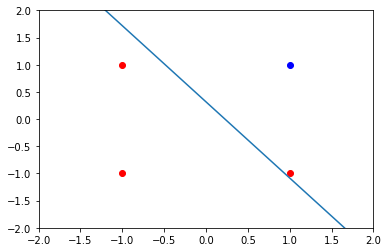

Bobot: [-0.23637972  0.48321423  0.52231051]


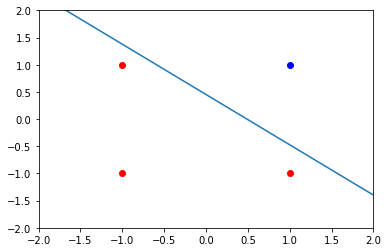

Bobot: [-0.31665138  0.56348589  0.44203886]


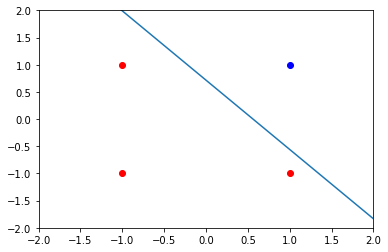

Bobot: [-0.28443377  0.53126828  0.40982124]


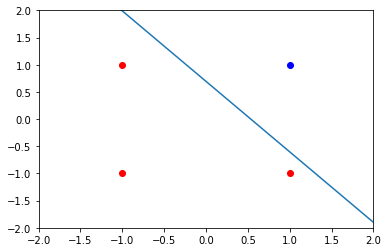


Epoch 5
Bobot: [-0.25009934  0.5656027   0.44415567]


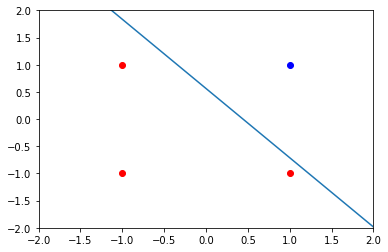

Bobot: [-0.33723411  0.47846793  0.53129044]


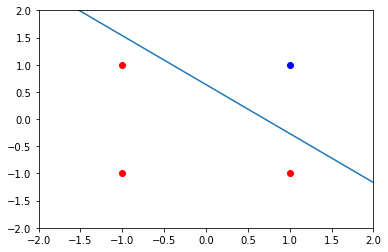

Bobot: [-0.40879295  0.55002677  0.4597316 ]


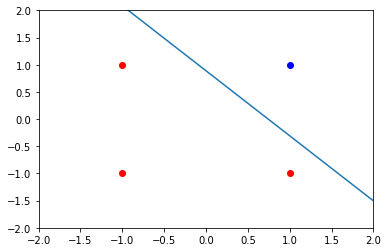

Bobot: [-0.36693782  0.50817164  0.41787647]


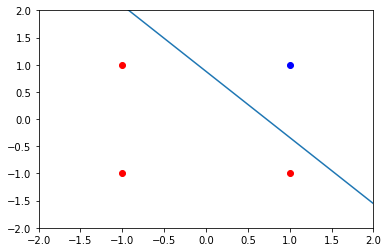

Output: [1, -1, -1, -1]
Epoch: 5
Target: (1, -1, -1, -1)
Accuracy: 1.0


In [34]:
train = (1, 1), (1, -1), (-1, 1), (-1, -1)
target = 1, -1, -1, -1
w, epoch = adaline_fit(train, target, verbose=True, draw=True)
output = adaline_predict(train, w)
accuracy = calc_accuracy(output, target)

print('Output:', output)
print('Epoch:', epoch)
print('Target:', target)
print('Accuracy:', accuracy)


Epoch 1
Bobot: [0.02582844 0.66781754 0.8729511 ]


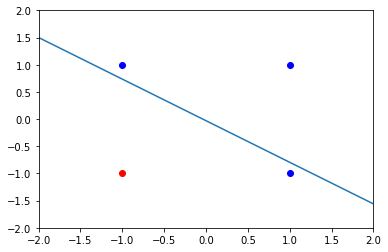

Bobot: [0.14375896 0.78574805 0.75502059]


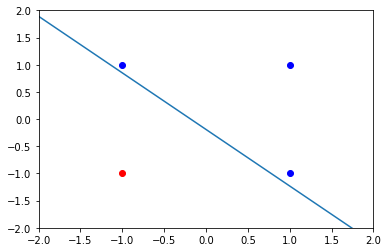

Bobot: [0.23245581 0.6970512  0.84371744]


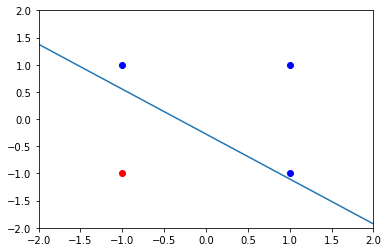

Bobot: [0.26328709 0.66621992 0.81288616]


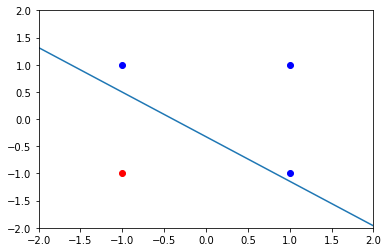


Epoch 2
Bobot: [0.18904777 0.5919806  0.73864684]


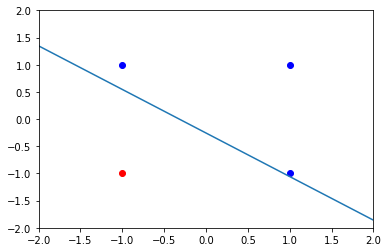

Bobot: [0.28480962 0.68774245 0.64288499]


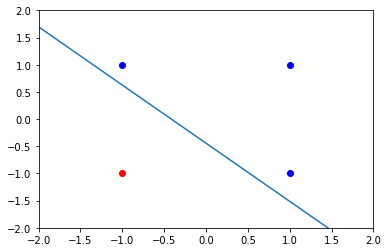

Bobot: [0.3608144  0.61173766 0.71888978]


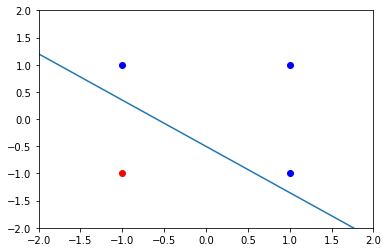

Bobot: [0.35779571 0.61475636 0.72190847]


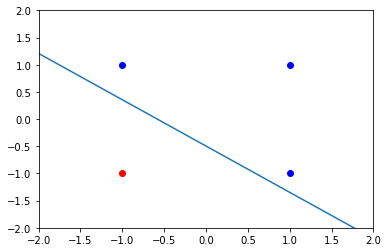

Output: [1, 1, 1, -1]
Epoch: 2
Target: (1, 1, 1, -1)
Accuracy: 1.0


In [35]:
train = (1, 1), (1, -1), (-1, 1), (-1, -1)
target = 1, 1, 1, -1
w, epoch = adaline_fit(train, target, verbose=True, draw=True)
output = adaline_predict(train, w)
accuracy = calc_accuracy(output, target)

print('Output:', output)
print('Epoch:', epoch)
print('Target:', target)
print('Accuracy:', accuracy)


Epoch 1
Bobot: [ 0.03987714  0.42075564 -0.09533877]


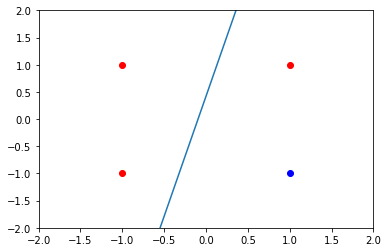

Bobot: [ 0.08427998  0.46515849 -0.13974162]


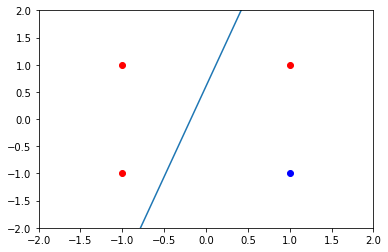

Bobot: [ 0.036342    0.51309647 -0.1876796 ]


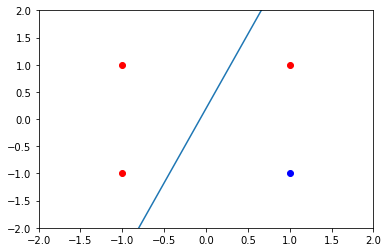

Bobot: [-0.03475052  0.58418899 -0.11658709]


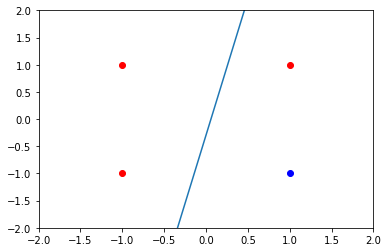


Epoch 2
Bobot: [-0.17803565  0.44090385 -0.25987223]


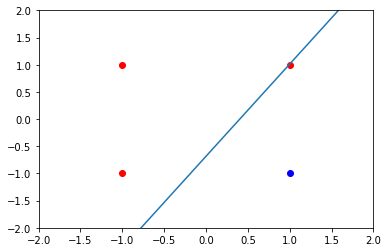

Bobot: [-0.1303097   0.48862981 -0.30759819]


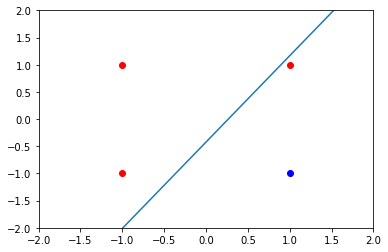

Bobot: [-0.13765593  0.49597604 -0.31494442]


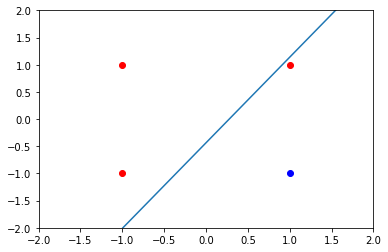

Bobot: [-0.20578717  0.56410728 -0.24681317]


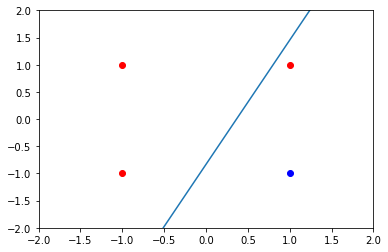


Epoch 3
Bobot: [-0.31693787  0.45295659 -0.35796387]


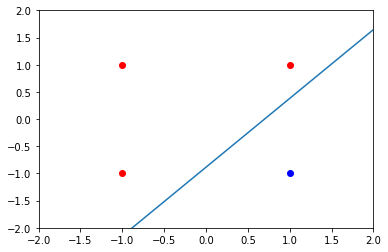

Bobot: [-0.26633613  0.50355833 -0.40856561]


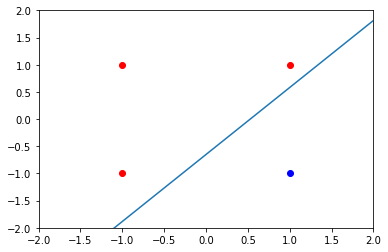

Bobot: [-0.24849012  0.48571232 -0.3907196 ]


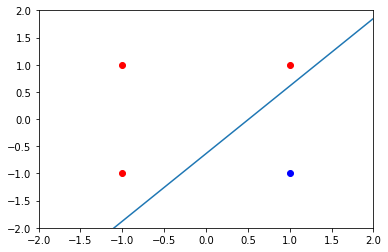

Bobot: [-0.31414184  0.55136404 -0.32506789]


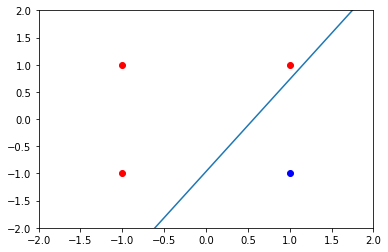


Epoch 4
Bobot: [-0.40535727  0.46014861 -0.41628332]


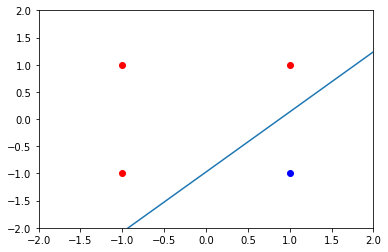

Bobot: [-0.35246473  0.51304114 -0.46917585]


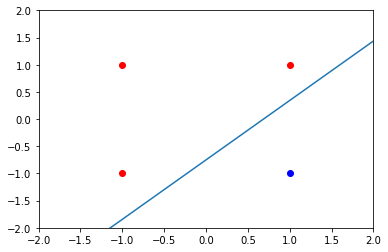

Bobot: [-0.31899656  0.47957297 -0.43570768]


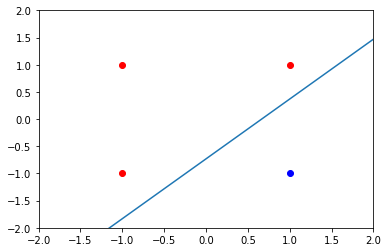

Bobot: [-0.38271038  0.54328678 -0.37199386]


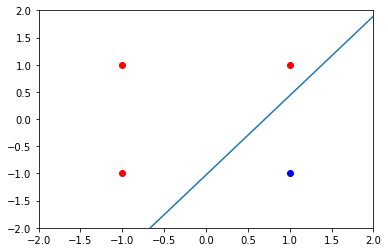

Output: [-1, 1, -1, -1]
Epoch: 4
Target: (-1, 1, -1, -1)
Accuracy: 1.0


In [36]:
train = (1, 1), (1, -1), (-1, 1), (-1, -1)
target = -1, 1, -1, -1
w, epoch = adaline_fit(train, target, verbose=True, draw=True)
output = adaline_predict(train, w)
accuracy = calc_accuracy(output, target)

print('Output:', output)
print('Epoch:', epoch)
print('Target:', target)
print('Accuracy:', accuracy)

In [37]:
train = (1, 1), (1, -1), (-1, 1), (-1, -1)
target = -1, 1, 1, -1
w, epoch = adaline_fit(train, target, verbose=True, draw=False)
output = adaline_predict(train, w)
accuracy = calc_accuracy(output, target)

print('Output:', output)
print('Epoch:', epoch)
print('Target:', target)
print('Accuracy:', accuracy)


Epoch 1
Bobot: [0.19268601 0.07289937 0.01856515]
Bobot: [ 0.26798399  0.14819735 -0.05673283]
Bobot: [0.36167861 0.05450273 0.03696179]
Bobot: [0.2346572  0.18152414 0.1639832 ]

Epoch 2
Bobot: [0.07664075 0.02350769 0.00596675]
Bobot: [ 0.16722258  0.11408952 -0.08461509]
Bobot: [0.27037078 0.01094131 0.01853312]
Bobot: [0.14628115 0.13503095 0.14262275]

Epoch 3
Bobot: [ 0.00388766 -0.00736254  0.00022927]
Bobot: [ 0.10425807  0.09300788 -0.10014115]
Bobot: [ 0.21314717 -0.01588122  0.00874795]
Bobot: [0.09111913 0.10614683 0.13077599]

Epoch 4
Bobot: [-0.04168507 -0.02665737 -0.0020282 ]
Bobot: [ 0.06494635  0.07997406 -0.10865963]
Bobot: [ 0.17731509 -0.03239468  0.00370911]
Bobot: [0.05671502 0.08820539 0.12430917]

Epoch 5
Bobot: [-0.07020794 -0.03871757 -0.00261379]
Bobot: [ 0.04042324  0.0719136  -0.11324496]
Bobot: [ 0.15489677 -0.04255993  0.00122857]
Bobot: [0.03527396 0.07706288 0.12085139]

Epoch 6
Bobot: [-0.08804487 -0.04625594 -0.00246744]
Bobot: [ 0.02513847  0.06692

KeyboardInterrupt: 